In [89]:
# importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [90]:
# loading dataset
data = pd.read_csv('car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [91]:
# checking number of rows and columns
data.shape

(301, 9)

In [92]:
# getting dataset details
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [93]:
# checking if there are null items
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [94]:
#checking the number of unique values of selected columns
print(data['Fuel_Type'].value_counts(),'\n')
print(data['Seller_Type'].value_counts(),'\n')
print(data['Transmission'].value_counts(),'\n')
print(data['Owner'].value_counts())



Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64 

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64 

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64 

Owner
0    290
1     10
3      1
Name: count, dtype: int64


In [95]:
# transforming the features in numbers
a = {'Petrol': 0,
     'Diesel':1,
     'CNG': 2}

b = {'Dealer': 0,
     'Individual':1,
     }

c = {'Manual': 0,
     'Automatic':1,
     }

In [96]:
data['Fuel_Type'] = data['Fuel_Type'].map(a)
data['Seller_Type'] = data['Seller_Type'].map(b)
data['Transmission'] = data['Transmission'].map(c)
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [97]:
# splitting the dataset in features and target
X = data.drop(['Car_Name','Selling_Price'], axis=1)
y= data['Selling_Price']

In [98]:
# splitting the data in train and test samples
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.2, )

## Linear Model

In [100]:
# importing the model
from sklearn.linear_model import LinearRegression


In [101]:
# fitting and prediction train data
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
pred_linear = model_linear.predict(X_train)


In [102]:
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error


In [103]:
score = r2_score(y_train, pred_linear)
mae = mean_absolute_error(y_train, pred_linear)
rmse = root_mean_squared_error(y_train, pred_linear)
print(' R2 score = ', score, '\n')
print(' Mean Absolute Error = ', mae, '\n')
print(' Root Mean Squared Error = ', rmse, '\n')

 R2 score =  0.8838169193709792 

 Mean Absolute Error =  1.199852024214222 

 Root Mean Squared Error =  1.7909012678408935 



Text(0, 0.5, 'Predicted Price')

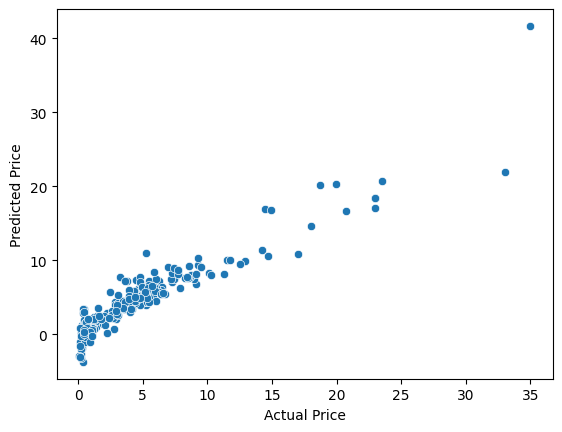

In [104]:
sns.scatterplot(x=y_train, y=pred_linear)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')


In [105]:
pred_linear_test = model_linear.predict(X_test)


In [106]:
score = r2_score(y_test, pred_linear_test)
mae = mean_absolute_error(y_test, pred_linear_test)
rmse = root_mean_squared_error(y_test, pred_linear_test)
print(' R2 score = ', score, '\n')
print(' Mean Absolute Error = ', mae, '\n')
print(' Root Mean Squared Error = ', rmse, '\n')




 R2 score =  0.8401532365378521 

 Mean Absolute Error =  1.2671998472908725 

 Root Mean Squared Error =  1.713424474241899 



Text(0, 0.5, 'Predicted Price')

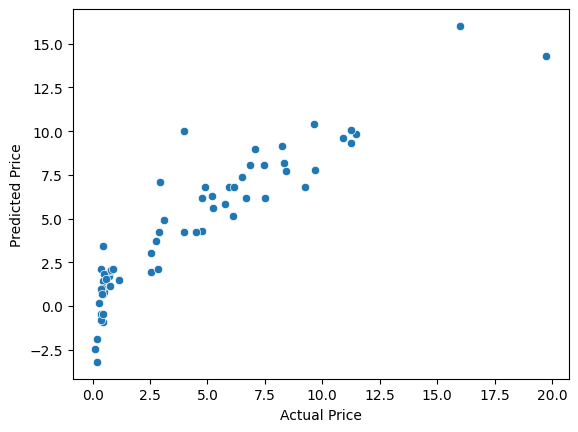

In [107]:
sns.scatterplot(x=y_test, y=pred_linear_test)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

## Lasso Model

In [108]:
from sklearn.linear_model import Lasso 

In [109]:
model_lasso = Lasso()
model_lasso.fit(X_train, y_train)
pred_lasso = model_lasso.predict(X_train)

In [110]:
score = r2_score(y_train, pred_lasso)
mae = mean_absolute_error(y_train, pred_lasso)
rmse = root_mean_squared_error(y_train, pred_lasso)
print(' R2 score = ', score, '\n')
print(' Mean Absolute Error = ', mae, '\n')
print(' Root Mean Squared Error = ', rmse, '\n')

 R2 score =  0.843587395258283 

 Mean Absolute Error =  1.2810306200223531 

 Root Mean Squared Error =  2.0779546935732527 



Text(0, 0.5, 'Predicted Price')

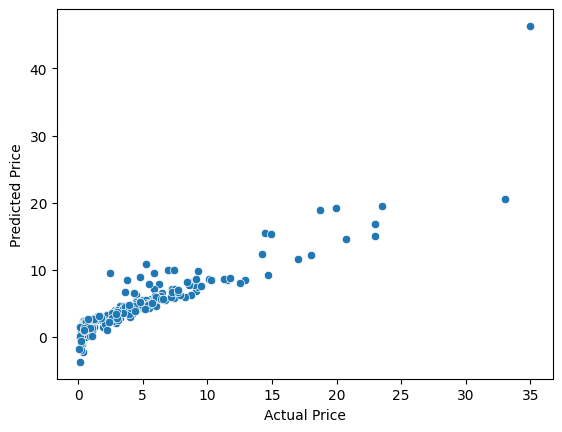

In [111]:
sns.scatterplot(x=y_train, y=pred_lasso)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

In [112]:
pred_lasso_test = model_lasso.predict(X_test)


In [113]:
score = r2_score(y_test, pred_lasso_test)
mae = mean_absolute_error(y_test, pred_lasso_test)
rmse = root_mean_squared_error(y_test, pred_lasso_test)
print(' R2 score = ', score, '\n')
print(' Mean Absolute Error = ', mae, '\n')
print(' Root Mean Squared Error = ', rmse, '\n')

 R2 score =  0.8497457570738539 

 Mean Absolute Error =  1.1893278434426198 

 Root Mean Squared Error =  1.6612171831706783 



Text(0, 0.5, 'Predicted Price')

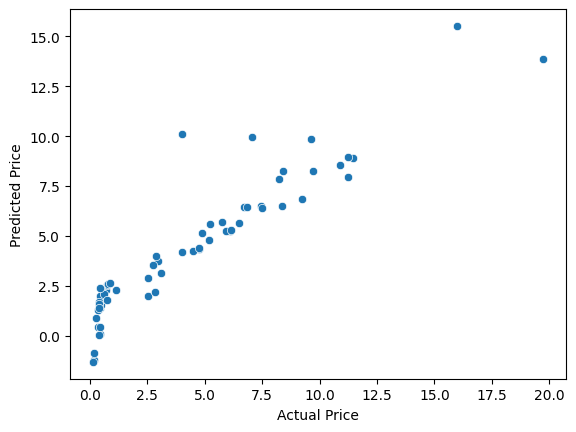

In [114]:
sns.scatterplot(x=y_test, y=pred_lasso_test)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')